# Projeto de Estudo de Data Science

Neste projeto irei usar de uma base de dados do site Kaggle com informações de imóveis de São Paulo que foi tratada para respeitar o anonimato e as diretrizes da LGPD. No decorrer do arquivo, uso e explico técnicas da linguagem Python e suas bibliotecas usadas na manipulação, tratamento e visualização de dados.

## Visão geral sobre os dados

Inicialmente foi feita a importação da biblioteca Pandas e a leitura do arquivo com seu método `.read()`, seguindo com `head()` para mostrar as primeiras linhas da planilha.

In [195]:
import pandas as pd
PlanilhaImoveis = "https://github.com/JRoberto25/Estudo-DataScience"
dados = pd.read_csv("dados_imoveis.csv")
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Após salvar o caminho do arquivo lido pelo Pandas em uma variável, é possível trabalhar com ela de várias maneiras, além de usar diversos métodos. Um deles é usado para obter as informações do tipo primitivo das colunas da tabela e verificar dados não nulos, chamado `.info()`.

In [196]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Uma outra forma de obter uma visualização geral dos dados é o `.sample()` que reune uma quantidade x de linhas aleatórias da tabela.

In [197]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1537,Rua Laerte Assunção,Jardim Paulistano,São Paulo,450,4,4,4,R$ 6.990.000
8819,Rua Jorge Tibiriçá,Vila Mariana,São Paulo,245,3,2,2,R$ 6.000\n /Mês
1208,NaN,Jardim Leonor,São Paulo,600,4,6,6,R$ 5.500.000
5644,NaN,Saúde,São Paulo,185,4,3,5,R$ 3.500\n /Mês
2537,NaN,Planalto Paulista,São Paulo,250,4,6,4,R$ 1.915.000
9397,Rua Júlio Rua Perez,Campo Belo,São Paulo,145,3,3,2,R$ 1.280.000
9938,"Rua das Fiandeiras, 201",Vila Olímpia,São Paulo,305,4,7,2,R$ 3.900.000
1677,NaN,Morumbi,São Paulo,410,3,4,4,R$ 3.400.000
9340,NaN,Pinheiros,São Paulo,205,2,4,2,R$ 1.995.000
9414,NaN,Vila Santo Estéfano,São Paulo,126,2,3,8,R$ 1.500.000


Métodos matemáticos também podem ser aplicados nas tabelas, basta que na variável que guarda os dados seja mencionada a coluna e em seguida a operação, como a seguir:

In [198]:
dados.Metragem.mean()

442.30065947242207

Passando entre colchetes para a variável uma string com o nome da coluna, é possivel buscar alguma ocorrência. No caso a seguir também foi realizada a soma (contagem) dessas ocorrências.

In [199]:
sum((dados["Bairro"] == "Vila Mariana"))

184

Quando colocamos algo entre os colchetes da variável que guarda os dados, especificamos qual trecho de dados queremos que seja exibida. No caso abaixo guardei na variável ImoveisVM a tabela dados onde na coluna Bairro possue o valor igual à Vila Mariana.

In [200]:
ImoveisVM = dados[(dados["Bairro"] == "Vila Mariana")]
ImoveisVM

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


Após salvar a tabela em uma variável, podemos trabalhar com ela.

In [201]:
ImoveisVM["Metragem"].mean()

233.6195652173913

A partir das tecnicas anteriores, foi salvo na variável NumImoveisBairros a contagem dos valores da coluna Bairro através do método `.value_counts()`.


In [202]:
NumImoveisBairros = dados['Bairro'].value_counts()
NumImoveisBairros

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

In [203]:
ImoveisVM['Rua'].value_counts()

Rua Pero Correia               12
Rua Morgado de Mateus           8
Rua Embuaçu                     5
Rua Sousa Ramos                 5
Rua Brás Lourenço               4
                               ..
Rua da União                    1
Rua Victor Brecheret            1
Rua Potenji                     1
Avenida Lins de Vasconcelos     1
Rua França Pinto                1
Name: Rua, Length: 89, dtype: int64

Todos esses método usados servem para filtar segmentos, agrupar dados e fazer operações matemáticas no data frame. Além disso podemos fazer representações gráficas da quantidade de imóveis por bairro em um gráfico criado pelo método `plot.bar()`, nativo do pandas ou através de outras bibliotecas.

<Axes: title={'center': 'Número de Imóveis por Bairros'}>

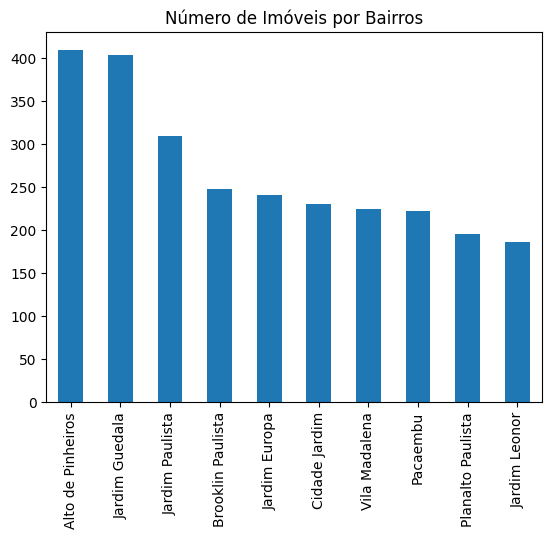

In [204]:
NumImoveisBairros.head(10).plot.bar(title='Número de Imóveis por Bairros')

## Seleção, Limpeza e Contagem de Dados.

Outra maneira de selecionar dados é usando o `.groupby()`, em que uma coluna foi usada para agrupar e a outra foi tirado a média. Em seguida o `.sort_values()` foi usado para organizar em ordem decrescente e exibido os 10 primeiros. O `.round()` foi usado apenas para arredondar as casas decimais.

In [205]:
BairrosMetragem = dados.groupby('Bairro')['Metragem'].mean().round(2)
BairrosMetragem.sort_values(ascending=False).head(10)

Bairro
Sítio Represa                37000.00
Vila Castelo                  2850.00
Jardim Guedala                2486.64
Jardim das Camélias           1700.00
Chácara Flora                 1260.73
Jardim Sílvia (Zona Oeste)    1189.26
Retiro Morumbi                1084.05
Vila Aurora (Zona Norte)      1082.50
Paineiras do Morumbi           757.27
Vila Ivone                     722.50
Name: Metragem, dtype: float64

É possível reparar que o Sítio Represa possue uma média muito maior que possivelmente existe uma amostra pequena com valores muito grandes, que para uma análise, poderia ser descartado.

In [206]:
ISR = (dados['Bairro'] == 'Sítio Represa')
ISRdataframe = dados[ISR]
ISRdataframe

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000


Para excluir uma linha do data frame basta utilizar o método `.drop()` com o inplace ativo para a mudança ser permanente. Refazendo a consulta, vemos que o número de linhas diminuiu do número de linhas original (10008).

In [207]:
dados.drop(6600, inplace=True)

In [208]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10007 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6573 non-null   object
 1   Bairro     9995 non-null   object
 2   Cidade     10007 non-null  object
 3   Metragem   10007 non-null  int64 
 4   Quartos    10007 non-null  int64 
 5   Banheiros  10007 non-null  int64 
 6   Vagas      10007 non-null  int64 
 7   Valor      10007 non-null  object
dtypes: int64(4), object(4)
memory usage: 703.6+ KB


Nesse sentido, outras análises similares podem ser feitas a fim de reduzir valores dicrepantes advindos de amostras pequenas.

### Valores Nulos(NaN)

Na mostragem das informações com o `.info()` é possível reparar que alguns campos possuem valores nulos. Aqui foram contados, por bairro, a quantidade de valores nulos.

In [209]:
RuaBairro = dados[['Rua', 'Bairro']]
RuaNanFilter = RuaBairro[(RuaBairro["Rua"].isnull())]
RuaNanFilter.Bairro.value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

Filtando por uma coluna é possível fazer contagens de ocorrências de outras colunas como o exemplo:

In [210]:
JG = dados[(dados["Bairro"] == "Jardim Guedala")]
JG.Rua.value_counts()

Rua Sanharó                           14
Rua Doutor Queirós Guimarães          12
Rua Albertina de Oliveira Godinho     10
Rua Araporé                           10
Rua Olegário Mariano                   9
                                      ..
Rua Conseguina                         1
Rua Magalhães de Araújo, 84            1
Rua Doutor Queirós Guimarães, 216      1
Rua Santa Judite                       1
Rua Aleutas                            1
Name: Rua, Length: 66, dtype: int64

### Formatação de Valores

Observando a coluna dos valores, é possível notar a variedade de formas que os valores aparecem. Assim, é necessário uma formatação para padronizar os dados e possibilitar a manipulação e uso desses dados.

In [211]:
dados.Valor

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10007, dtype: object

Para conhecer melhor os dados da coluna Valor, convertemos os valores para strings e o separamos com o método `.split()` com expand= True, no qual a primeira coluna ficaram a moeda, na segunda o valor bruto e na última o tipo de pagamento para a aquisição/aluguél dos imóveis. 

In [212]:
Valores = dados.Valor.str.split(expand= True)
Valores

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


Para verificar se a única moeda considerada no valor das transações foi o real, a função unique() compara todas as ocorrências da coluna 0 e traz os resultados distintos. Isto nos dá certeza que dados imprecísos não nos atrapalharão. Essa verificação também pode ser feita na coluna 2, que retornará um array com os resutados none(para compras) e mês, semana, dia(formas de aluguél).

In [213]:
Valores[0].unique()

array(['R$'], dtype=object)

In [214]:
Valores[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

Agora podemos adicionar essas 3 colunas ao nosso data frame e excluir a coluna antiga de valores.

In [215]:
dados[['Moeda', 'Valores', 'TipoAquisicao']] = Valores
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valores,TipoAquisicao
2321,NaN,Jardim Paulista,São Paulo,1150,5,7,7,R$ 27.000.000,R$,27.000.000,None
6253,NaN,Caxingui,São Paulo,540,4,8,4,R$ 1.600.000,R$,1.600.000,None
8910,Rua Manuel Pitta,Vila Pita,São Paulo,264,4,4,10,R$ 750.000,R$,750.000,None
3133,Rua São Bráulio,Jardim Guedala,São Paulo,600,4,6,4,R$ 3.500.000,R$,3.500.000,None
5468,Rua Primavera,Jardim Paulista,São Paulo,300,3,3,2,R$ 3.650.000,R$,3.650.000,None
5400,NaN,Boaçava,São Paulo,420,3,3,4,R$ 2.800.000,R$,2.800.000,None
3452,Rua Gregório Paes de Almeida,Vila Madalena,São Paulo,310,4,3,5,R$ 14.000\n /Mês,R$,14.000,/Mês
570,Rua França,Jardim Europa,São Paulo,620,4,3,6,R$ 8.980.000,R$,8.980.000,None
9553,Rua Josimar Moreira de Melo,Jardim da Glória,São Paulo,298,4,4,5,R$ 1.950.000,R$,1.950.000,None
7676,Rua Honorato Faustino,Alto de Pinheiros,São Paulo,540,4,5,4,R$ 8.000.000,R$,8.000.000,None


Como apenas os dados de compra nos interessam, vamos filtar as linhas onde o tipo de aquisição não possue uma modalidade de aluguél, ou seja, os valores none. Dessa forma, em uma outra tabela chamada DadosVendas, salvamos apenas os valores nulos para a coluna TipoAquisição e usamos o unique para confirmar se está como planejado.

In [216]:
DadosVendas = dados[dados.TipoAquisicao.isnull()]
DadosVendas.TipoAquisicao.unique()

array([None], dtype=object)

Observando os tipos de dados, devemos alterar o tipo da coluna Valores para float e com isso poder fazer operações aritméticas com os números dela.

In [217]:
DadosVendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9155 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6106 non-null   object
 1   Bairro         9145 non-null   object
 2   Cidade         9155 non-null   object
 3   Metragem       9155 non-null   int64 
 4   Quartos        9155 non-null   int64 
 5   Banheiros      9155 non-null   int64 
 6   Vagas          9155 non-null   int64 
 7   Valor          9155 non-null   object
 8   Moeda          9155 non-null   object
 9   Valores        9155 non-null   object
 10  TipoAquisicao  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.3+ KB


Os números tiveram os pontos de separação removidos e alterados para o tipo float. Os novos dados foram colocados na tabela DadosVendas.

In [218]:
VendasFloat = DadosVendas.Valores.str.replace('.', '').astype(float)
VendasFloat

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\2344785407.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  VendasFloat = DadosVendas.Valores.str.replace('.', '').astype(float)


0       7000000.00
1       3700000.00
2        380000.00
3        685000.00
4        540000.00
           ...    
10002   1500000.00
10003    665000.00
10004   2300000.00
10005   1050000.00
10007    270000.00
Name: Valores, Length: 9155, dtype: float64

In [219]:
DadosVendas.Valores = VendasFloat
DadosVendas

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\3632381209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DadosVendas.Valores = VendasFloat


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valores,TipoAquisicao
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None


Dessa forma, temos uma coluna com a moeda, uma com o valor em float e outra denominada TipoAquisicao na qual guarda a informação do pagamento pelo imóvel, se é por dia, mês ou ano (aluguel) ou com o valor vazio que se refere a uma compra. Usando o método `.info()`, podemos verificar que o tipo da coluna dos valores realmente foi alterada.

In [220]:
DadosVendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9155 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            6106 non-null   object 
 1   Bairro         9145 non-null   object 
 2   Cidade         9155 non-null   object 
 3   Metragem       9155 non-null   int64  
 4   Quartos        9155 non-null   int64  
 5   Banheiros      9155 non-null   int64  
 6   Vagas          9155 non-null   int64  
 7   Valor          9155 non-null   object 
 8   Moeda          9155 non-null   object 
 9   Valores        9155 non-null   float64
 10  TipoAquisicao  0 non-null      object 
dtypes: float64(1), int64(4), object(6)
memory usage: 858.3+ KB


Agora podemos ter um panorama melhor de forma geral sobre os valores tratados e também sobre outros campos com a função `describe()`.

In [221]:
DadosVendas.describe(include= 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valores,TipoAquisicao
count,6106,9145,9155,9155.00,9155.00,9155.00,9155.00,9155,9155,9155.00,0
unique,3005,696,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9155,NaN,NaN,NaN,NaN,182,9155,NaN,NaN
mean,NaN,NaN,NaN,430.42,3.45,3.80,3.96,NaN,NaN,3052219.58,NaN
std,NaN,NaN,NaN,7847.55,1.05,1.97,2.60,NaN,NaN,3944423.30,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


Esse método é responsável pela apresentação dos dados estatísticos contidos nas variáveis numéricas do dataframe. Por ter usado o `include= 'all'` todas as colunas foram incluídas e embora não numéricas, alguns campos geram informações para essas colunas como o 'conut' e o 'unique' por exemplo, que podem ser bem úteis em uma análise rápida. O signifcado dos campos são:
* count - contagem das linhas com valores não nulos;
* mean - média amostral dos valores da coluna;
* std - desvio padrão dos valores da coluna; 
* min - o valor mínimo encontrado;
* 25%, 50%, 75% - são os percentuais dos valores da coluna;
* max - o valor máximo.

Para melhorar a visualização, setamos para o pandas uma precisão de duas casas decimais, além de formatar os valores com uma função lambda.

In [222]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
DadosVendas.describe(include= 'all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valores,TipoAquisicao
count,6106,9145,9155,9155.00,9155.00,9155.00,9155.00,9155,9155,9155.00,0
unique,3005,696,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9155,NaN,NaN,NaN,NaN,182,9155,NaN,NaN
mean,NaN,NaN,NaN,430.42,3.45,3.80,3.96,NaN,NaN,3052219.58,NaN
std,NaN,NaN,NaN,7847.55,1.05,1.97,2.60,NaN,NaN,3944423.30,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


## Análises Exploratórias e Gráficos

Inicialmente, foram importadas as biblotecas matplotlib e seaborn, usadas na construção de gráficos.  algumas análises e gráficos dos resultados obtidos até agora.

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

Tendo uma visualização do nosso dataframe, observamos algumas colunas que após os tratamentos podem ser removidas para organizar melhor. Para isso, removere-mos as colunas `Valor` e `TipoAquisicao` com o método `.drop()`.

In [224]:
DadosVendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valores,TipoAquisicao
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None


In [225]:
DadosVendas.drop('Valor', axis=1, inplace=True)
DadosVendas.drop('TipoAquisicao', axis=1, inplace=True)

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\1405569545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DadosVendas.drop('Valor', axis=1, inplace=True)
C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\1405569545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DadosVendas.drop('TipoAquisicao', axis=1, inplace=True)


In [226]:
DadosVendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valores
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.00


Para iniciar, podemos montar um histograma com os valores de venda dos imóveis do nosso dataframe. Com o matplotli(plt) criamos a exibição em uma figura 10 por 8, definimos o eixo x de -50 a 10 milhões e mandamos exibir. Entre o código do plt, usamos o seaborn(sns) para salvar em uma variável o gráfico em si e definir o título. Essas bibliotecas conversam bem entre si pois o seaborn foi feito baseado no matplotlib, que permite um ótimo trabalho em conjunto.

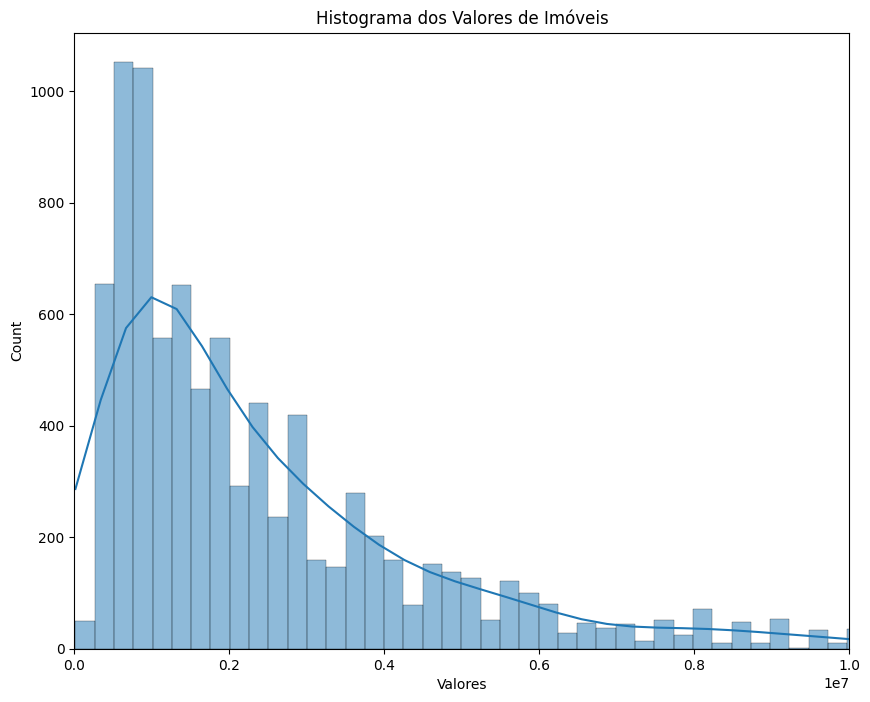

In [227]:
plt.figure(figsize=(10, 8))
gv = sns.histplot(data = DadosVendas, x = "Valores", kde = True)
gv.set_title("Histograma dos Valores de Imóveis")
plt.xlim((-50, 10000000))
plt.show()

Uma métrica importante para as análises é o valor do metro quadrado, no entanto, existem várias formas de se ter esses dados. Inicialmente, podemos ver o valor do metro quadrado de forma individual. Foi feito a divisão e salvo em uma nova coluna chamada Valores_m2.

In [228]:
DadosVendas["Valores_m2"] = DadosVendas.Valores / DadosVendas.Metragem
DadosVendas.head()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\3966460498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DadosVendas["Valores_m2"] = DadosVendas.Valores / DadosVendas.Metragem


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valores,Valores_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.00,5400.00


Agrupando e tirando a media, temos média metro quadrado de todos os imóveis agrupados por bairro. Embora traga uma boa mensuração, esse tipo de média não é tão eficiente pois é a média de uma média.
Foi criada uma nova variável para comparar os valores posteriormente. A coluna que será o parâmetro do agrupamento torna-se o indice após a utilização do `groupby()`. Para facilitar, a função `reset_index()` coloca números como índices e o método inplace faz com que a mudança permaneça.

In [229]:
ComparaMedia = DadosVendas.groupby("Bairro").mean()
ComparaMedia.reset_index(inplace=True)
ComparaMedia

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\979828088.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ComparaMedia = DadosVendas.groupby("Bairro").mean()


,Bairro,Metragem,Quartos,Banheiros,Vagas,Valores,Valores_m2
0,Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
2,Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
3,Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...,...
691,Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
692,Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
693,Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10
694,Água Funda,139.00,3.00,2.50,2.00,545000.00,3876.86


Uma média mais realista é soma dos valores por bairro, em seguida, a média do metro quadrado por bairro. Esta é uma visão melhor dos preços pela localidade e não pelo imóvel em particular. Os novos dados foram salvos na coluna Valores_m2_Bairro.

In [230]:
DadosBairro = DadosVendas.groupby("Bairro").sum()
DadosBairro["Valores_m2_Bairro"] = DadosBairro.Valores / DadosBairro.Metragem
DadosBairro.reset_index(inplace=True)
DadosBairro.head()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_19200\3820120041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DadosBairro = DadosVendas.groupby("Bairro").sum()


,Bairro,Metragem,Quartos,Banheiros,Vagas,Valores,Valores_m2,Valores_m2_Bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34


Na variável ComparaMedia que guardava os dados anteriores, foi adicionada uma coluna da útima análise feita, com o mesmo nome para a comparação entre a media dos bairros pela media das medias individuais.
É possível notar a diferenca de valores, que se dá pela forma com que os cálculos foram feitos. Calculando a média individual, teremos imóveis muito valiosos que terão um valor de metro quadrado bem fora da curva, assim como imóveis muito desvalorizados que puxarão a primeira média mais para cima ou para baixo. A segunda forma minimizou essa diferença quando olhado pela ótica da localidade em si, porém esses imóveis ainda influenciam bastante e devem ser levados em consideração na construção de um modelo, por exemplo.

In [231]:
ComparaMedia["Valores_m2_Bairro"] = DadosBairro["Valores_m2_Bairro"]
ComparaMedia.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valores,Valores_m2,Valores_m2_Bairro
0,Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17,7162.69
1,Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57,5708.74
2,Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73,6961.30
3,Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74,4385.00
4,Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98,11126.34


Agora podemos fazer uma comparação interessante entre o valor do metro quadrado por bairro e o valor do metro quadrado do imóvel. Para isso será adicionado ao nosso dataframe, as colunas com os valores do metro quadrado correspondentes ao imóvel e ao bairro utilizando o método `.merge()`.

In [232]:
Valores_m2_Bairro = ComparaMedia[['Bairro', 'Valores_m2_Bairro']]
DadosFinal = DadosVendas.merge(Valores_m2_Bairro, on='Bairro', how='left')
DadosFinal.head(15)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valores,Valores_m2,Valores_m2_Bairro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,6327.54
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$,3700000.00,7459.68,9167.47
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$,380000.00,3040.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$,685000.00,2209.68,6678.56
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$,540000.00,5400.00,5004.02
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$,1980000.00,4500.00,7309.32
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$,850000.00,5862.07,6565.22
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$,450000.00,3000.00,3000.00
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$,199900.00,4164.58,4164.58
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$,585000.00,5131.58,3436.89


Nesse sentido, as análises podem se moldar conforme as necessidades do problema, ou seja, remover dados que não seriam usados, adicionar colunas com outras métricas e assim por diante. No entanto, usarei esse data frame como um resultado final e explorar algumas visualizações gráficas, mas lembrando que os dados podem sempre continuar sendo limpos, adicionados e removidos.

-----

Podemos iniciar explorando gráficos para visualizar os bairros com mais imóveis à venda. Primeiramente, podemos separar 10 bairros usando o `.value_counts()` e indexar em uma lista para, em seguida, representa-los graficamente.

In [233]:
QueryImoveis = DadosFinal["Bairro"].value_counts()[:10].index
QueryImoveis

Index(['Alto de Pinheiros', 'Jardim Guedala', 'Jardim Paulista',
       'Brooklin Paulista', 'Jardim Europa', 'Pacaembu', 'Vila Madalena',
       'Cidade Jardim', 'Planalto Paulista', 'Jardim Leonor'],
      dtype='object')

Com a lista em mãos, usaremos ela como parâmetro para o método `.query()` que buscará os bairros da lista em nosso data frame, para armazená-los em uma variável. Além disso, o índice também será resetado para a criação dos gráficos.

In [234]:
DadosBairroTop = DadosFinal.query("Bairro in @QueryImoveis")
DadosBairroTop.reset_index(inplace=True)
DadosBairroTop #.groupby('Bairro').mean()

,index,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Moeda,Valores,Valores_m2,Valores_m2_Bairro
0,0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$,7000000.00,7000.00,6327.54
1,23,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,R$,1485000.00,8735.29,8803.82
2,30,Rua dos Plátanos,Cidade Jardim,São Paulo,1195,4,4,6,R$,8700000.00,7280.33,8805.10
3,39,Rua Gregório Paes de Almeida,Vila Madalena,São Paulo,401,5,9,4,R$,3890000.00,9700.75,8803.82
4,40,Avenida das Magnólias,Cidade Jardim,São Paulo,420,4,4,4,R$,2200000.00,5238.10,8805.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,9138,Rua Bragança,Pacaembu,São Paulo,285,3,4,5,R$,2450000.00,8596.49,8654.90
2361,9142,Rua Circular do Bosque,Jardim Guedala,São Paulo,655,5,6,4,R$,5000000.00,7633.59,1852.65
2362,9143,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$,9500000.00,7037.04,6653.49
2363,9148,Rua Bauru,Pacaembu,São Paulo,439,2,3,2,R$,5200000.00,11845.10,8654.90


Ordenando a lista do maior para o menor, usamos o seaborn para plotar um gráfico de barras para os 10 bairros com mais ocorrências, a última linha apenas exibe o gráfico e rotaciona os nomes dos bairros.

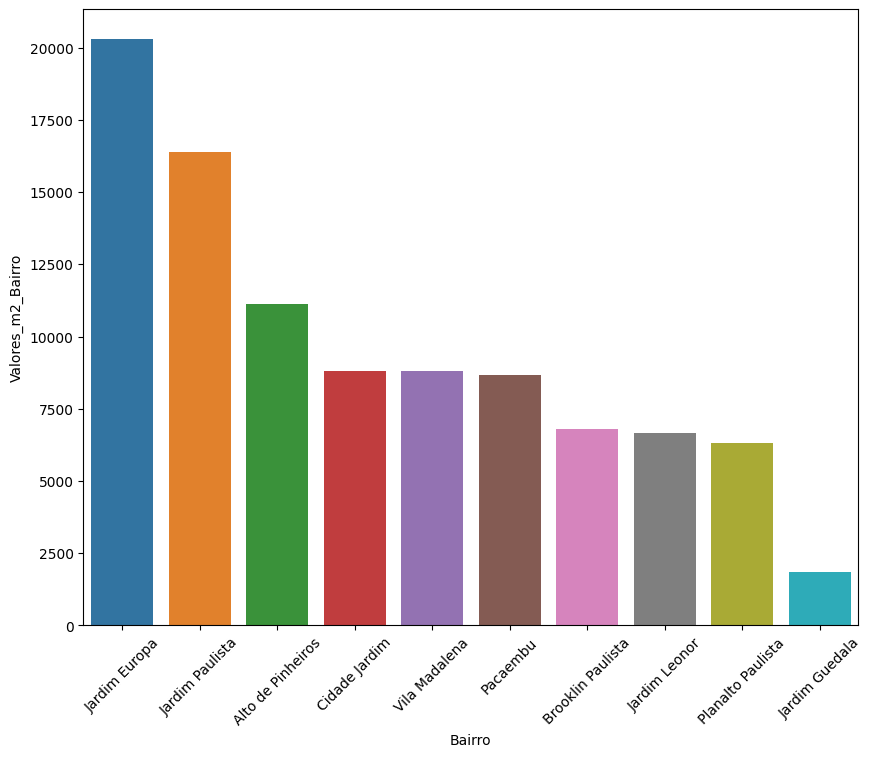

In [235]:
plt.figure(figsize=(10, 8))
DadosBairroTop = DadosBairroTop.sort_values(by="Valores_m2_Bairro", ascending=False)
ax = sns.barplot(data=DadosBairroTop, x="Bairro", y="Valores_m2_Bairro")
ax.tick_params(axis='x', rotation=45)

### Boxplot

A Boxplot é representação visual da distribuição e dispersão dos dados e possue alguns elementos-chave que ajudam a identificar características importantes do conjunto de dados.

Caixa (Box): É composto por um retângulo que representa o intervalo interquartil (IQR), que é a diferença entre o primeiro e o terceiro quartis (25% e 75% dos dados, respectivamente), com uma linha no meio que representa a mediana (50% dos dados).

Linhas: As linhas representam a dispersão dos dados. Pontos além dessas extremidades são considerados valores atípicos.

Valor Atípico (Outlier): São pontos individuais que estão fora do intervalo das linhas e indicam valores extremos ou incomuns nos dados.

------------------------------

Com isso, podemos usar esse intervalo de dados para plotar um boxplot, que exibe a visualização dos valores mínimos, medianas e outliers de forma mais clara usando seaborn.

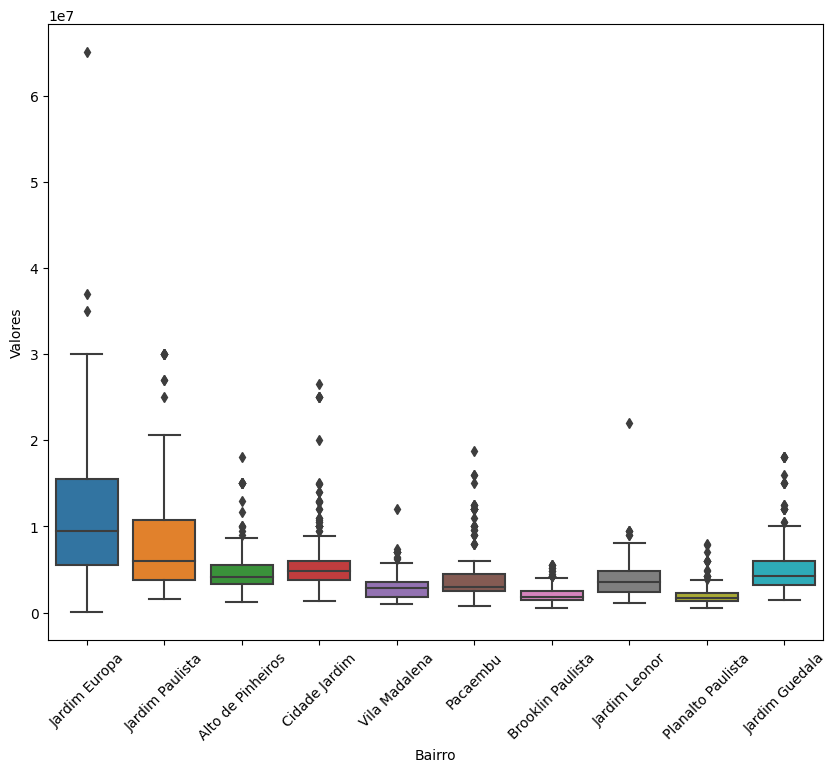

In [236]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = DadosBairroTop, x='Bairro', y="Valores")
ax.tick_params(axis='x', rotation=45)
plt.show()

Uma forma de eliminar alguns outliers, por exemplo, é limitar alguns conjuntos de dados como trazer apenas imóveis com metragem menor que 30.000 metros. Porém, em alguns casos, é preciso que alguns outliers permaneçam, depenpendendo do negócio, fazendo-se necessária uma boa leitura e cautela antes de tratar e eliminar outliers.

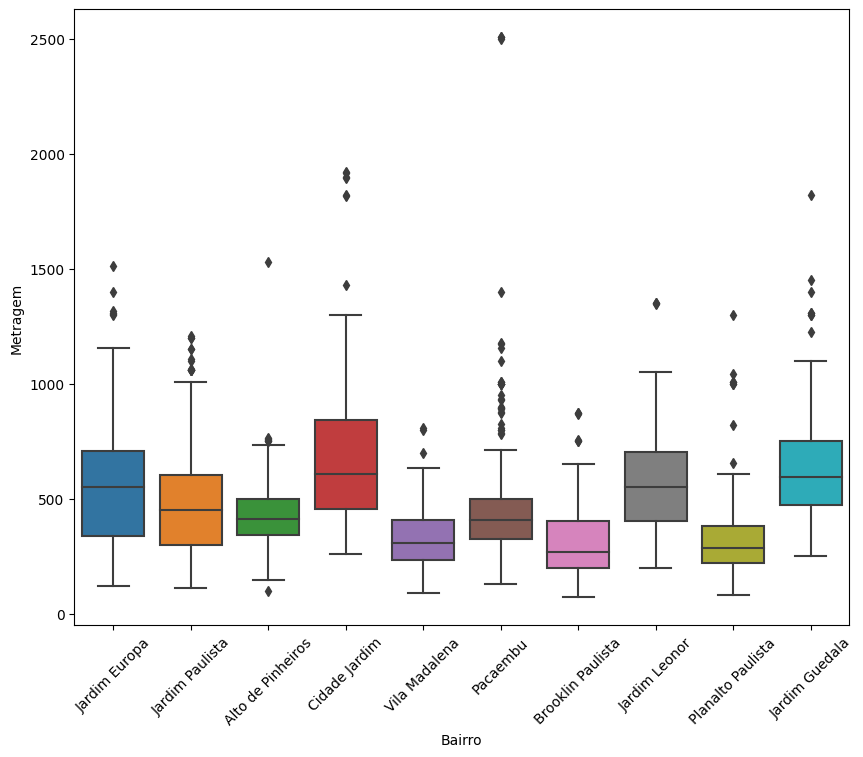

In [237]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = DadosBairroTop.query("Metragem < 30000"), x='Bairro', y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

## Removendo todos os outliers

No entanto, é possível remover todos os outliers da nossa visualização com um comando simples. o método `showfliers` recebendo o valor False, fará isso.

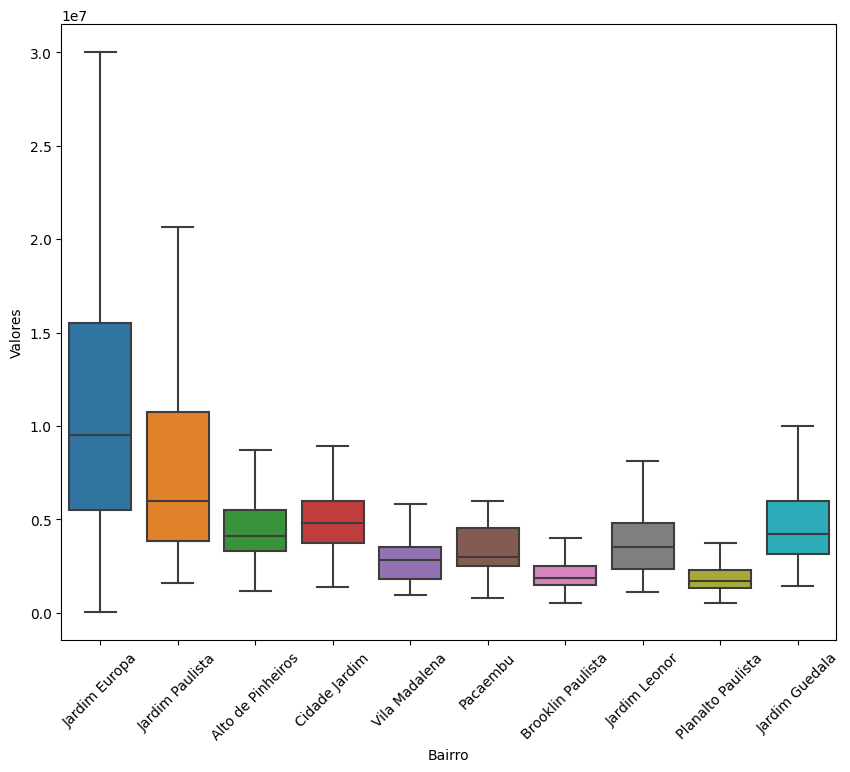

In [238]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = DadosBairroTop, x='Bairro', y="Valores", showfliers=False)
ax.tick_params(axis='x', rotation=45)
plt.show()

Além de visualizações gerais, podemos ver de formas mais específicas como por bairro, por rua, além de dados numéricos, tudo vai depender da necessidade do projetos. Este é o exemplo do bairro Jardim Guedala.

<Axes: xlabel='Bairro', ylabel='Valores'>

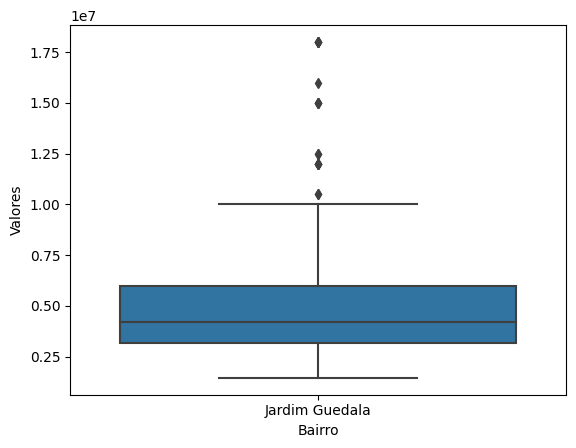

In [239]:
sns.boxplot(x="Bairro", y="Valores" ,data=DadosBairroTop.query("'Jardim Guedala' in Bairro"))

Outra maneira de visualização interessante é o próprio gráfico de dispersão que pode ser usado com vários parâmetros. Este é um exemplo visualizando os valores de acordo com a metragem dos imóveis também do bairro Jardim Guedala.

(0.0, 3000.0)

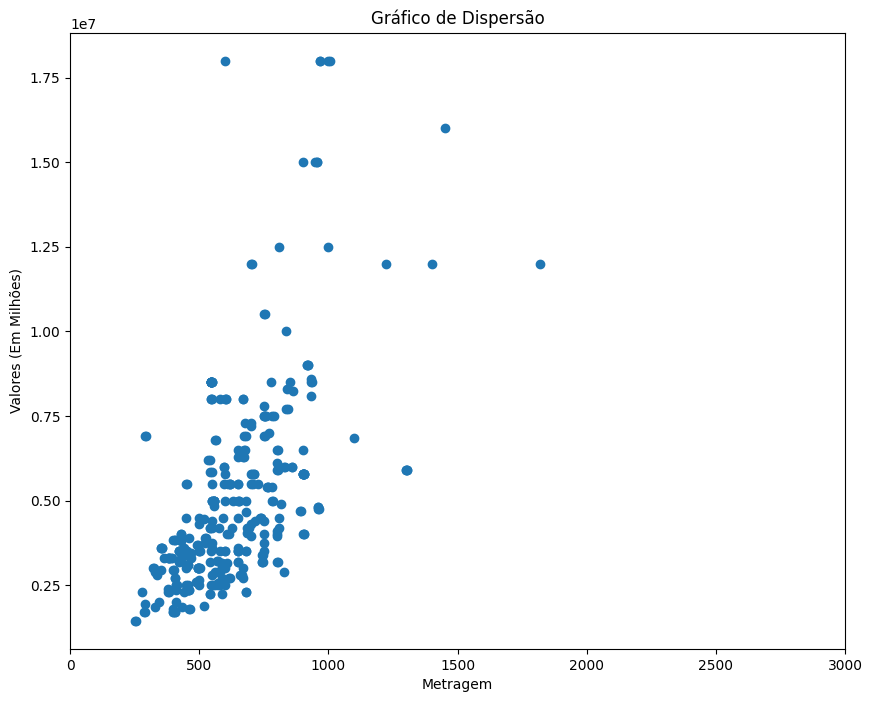

In [240]:
plt.figure(figsize=(10, 8))
plt.scatter(data = DadosFinal.query("'Jardim Guedala' in Bairro"), x="Metragem", y="Valores")
plt.xlabel("Metragem")
plt.ylabel("Valores (Em Milhões)")
plt.title("Gráfico de Dispersão")
plt.xlim(0, 3000)

Nesse sentido, as análises combinando essas poderosas ferramentas do Python podem trazer diversas formas de abordar, visualizar e resolver um problema, tudo dependerá do contexto e regra de negócio. Assim, esses conhecimentos básicos podem se adaptar para buscar soluções em todas as áreas de negócios.

------------------

Por fim, agradeço a leitura desse material de estudo. Superei muitos desafios na construção do código e adiquiri muitos conhecimentos valiosos, não só técnicos como também de pesquisa, maneiras de estudo e resiliência. Peço que para qualquer dica, correção ou ajuda, basta me procurar pelos contatos em meu perfil.